In [21]:
#Importing libraries to perform analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('ticks')

In [2]:
df = pd.read_csv("Electric_Vehicle_Charging_Stations_in_New_York.csv")

In [3]:
X_train = df

In [4]:
X_train.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,EV Connector Types
0,ELEC,JATC LU41,3546 California Rd,JATC LU41,Orchard Park,NY,14127,NaN,888-758-4389,E,...,42.787197,-78.787821,05/27/2020,62127,2020-05-27 09:20:32,NaN,NaN,NaN,NaN,J1772
1,ELEC,GE WattStation,214 3rd St,NaN,Brooklyn,NY,11215,NaN,855-443-3873,E,...,40.675331,-73.988563,05/15/2020,73056,2020-05-15 10:00:11,NaN,NaN,NaN,NaN,J1772
2,ELEC,STATION 1 @ VIL,70 E Main St,VICTOR; In lot next to church,Victor,NY,14564,NaN,888-758-4389,E,...,42.981755,-77.408360,05/27/2020,88701,2020-05-27 09:20:32,NaN,NaN,NaN,NaN,J1772
3,ELEC,CITY OF ITHACA,118 Dryden Rd,DRYDEN; 2nd floor,Ithaca,NY,14850,NaN,888-758-4389,E,...,42.442142,-76.486112,05/27/2020,92327,2020-05-27 09:20:32,NaN,NaN,NaN,NaN,J1772
4,ELEC,LANDING PARK,70 Main St,COEYMANS; -,Coeymans,NY,12045,NaN,888-758-4389,E,...,42.472557,-73.790396,05/27/2020,99993,2020-05-27 09:20:32,NaN,NaN,NaN,NaN,J1772


In [5]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Fuel Type Code', 'Station Name', 'Street Address', 'Intersection Directions', 'City', 'State', 'Station Phone', 'Status Code', 'Groups With Access Code', 'Access Days Time', 'Cards Accepted', 'EV Network', 'EV Network Web', 'Geocode Status', 'Date Last Confirmed', 'Updated At', 'Owner Type Code', 'Federal Agency Name', 'Open Date', 'EV Connector Types']


In [6]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

NameError: name 'X_valid' is not defined

In [8]:
df["City"].value_counts()

New York       318
Brooklyn        72
Rochester       61
Albany          45
Buffalo         43
              ... 
Pine Plains      1
Waterville       1
Fredonia         1
Greenvale        1
St. James        1
Name: City, Length: 422, dtype: int64

In [ ]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

In [9]:
df["EV Connector Types"].value_counts()

J1772                       1094
J1772 TESLA                  299
TESLA                        193
CHADEMO J1772COMBO            38
J1772COMBO                    11
CHADEMO J1772 J1772COMBO      11
CHADEMO J1772                 11
J1772 NEMA520                  6
J1772 J1772COMBO               6
CHADEMO                        4
NEMA520                        2
J1772 NEMA1450 NEMA520         1
J1772 NEMA515                  1
Name: EV Connector Types, dtype: int64

In [14]:
mapping_dict = {"EV Connector Types": {"J1772":1, "J1772 TESLA": 2, "TESLA": 3, "CHADEMO J1772COMBO": 4, "J1772COMBO": 5, "CHADEMO J1772 J1772COMBO": 6, "CHADEMO J1772": 7, "J1772 NEMA520": 8,"J1772 J1772COMBO": 9, "CHADEMO": 10, "NEMA520": 11, "J1772 NEMA1450 NEMA520": 12, "J1772 NEMA515": 13}}

In [16]:
#replacing the values
df.replace(mapping_dict, inplace=True)

In [17]:
df.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,EV Connector Types
0,ELEC,JATC LU41,3546 California Rd,JATC LU41,Orchard Park,NY,14127,NaN,888-758-4389,E,...,42.787197,-78.787821,05/27/2020,62127,2020-05-27 09:20:32,NaN,NaN,NaN,NaN,1
1,ELEC,GE WattStation,214 3rd St,NaN,Brooklyn,NY,11215,NaN,855-443-3873,E,...,40.675331,-73.988563,05/15/2020,73056,2020-05-15 10:00:11,NaN,NaN,NaN,NaN,1
2,ELEC,STATION 1 @ VIL,70 E Main St,VICTOR; In lot next to church,Victor,NY,14564,NaN,888-758-4389,E,...,42.981755,-77.408360,05/27/2020,88701,2020-05-27 09:20:32,NaN,NaN,NaN,NaN,1
3,ELEC,CITY OF ITHACA,118 Dryden Rd,DRYDEN; 2nd floor,Ithaca,NY,14850,NaN,888-758-4389,E,...,42.442142,-76.486112,05/27/2020,92327,2020-05-27 09:20:32,NaN,NaN,NaN,NaN,1
4,ELEC,LANDING PARK,70 Main St,COEYMANS; -,Coeymans,NY,12045,NaN,888-758-4389,E,...,42.472557,-73.790396,05/27/2020,99993,2020-05-27 09:20:32,NaN,NaN,NaN,NaN,1


In [18]:
df.dtypes

Fuel Type Code              object
Station Name                object
Street Address              object
Intersection Directions     object
City                        object
State                       object
ZIP                          int64
Plus4                      float64
Station Phone               object
Status Code                 object
Expected Date              float64
Groups With Access Code     object
Access Days Time            object
Cards Accepted              object
EV Level1 EVSE Num         float64
EV Level2 EVSE Num         float64
EV DC Fast Count           float64
EV Other Info              float64
EV Network                  object
EV Network Web              object
Geocode Status              object
Latitude                   float64
Longitude                  float64
Date Last Confirmed         object
ID                           int64
Updated At                  object
Owner Type Code             object
Federal Agency ID          float64
Federal Agency Name 

In [19]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [20]:
missing_percentage(df)

,Total,Percent
Expected Date,1677,100.00
Plus4,1677,100.00
EV Other Info,1677,100.00
Federal Agency Name,1676,99.94
Federal Agency ID,1676,99.94
EV Level1 EVSE Num,1667,99.40
Cards Accepted,1631,97.26
EV DC Fast Count,1548,92.31
Intersection Directions,904,53.91
Owner Type Code,835,49.79


### Runing some analysis by removing all missing values

In [22]:
df2 = df.drop(['Intersection Directions', 'Plus4',
       'Station Phone', 'Expected Date','Cards Accepted',
       'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count',
       'EV Other Info', 'EV Network Web',
       'Owner Type Code', 'Federal Agency ID', 'Federal Agency Name',
       'Open Date'], axis=1)

In [23]:
df2.head()

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Status Code,Groups With Access Code,Access Days Time,EV Network,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,EV Connector Types
0,ELEC,JATC LU41,3546 California Rd,Orchard Park,NY,14127,E,Public,24 hours daily,ChargePoint Network,GPS,42.787197,-78.787821,05/27/2020,62127,2020-05-27 09:20:32,1
1,ELEC,GE WattStation,214 3rd St,Brooklyn,NY,11215,E,Public,24 hours daily,GE WattStation,GPS,40.675331,-73.988563,05/15/2020,73056,2020-05-15 10:00:11,1
2,ELEC,STATION 1 @ VIL,70 E Main St,Victor,NY,14564,E,Public,24 hours daily,ChargePoint Network,GPS,42.981755,-77.408360,05/27/2020,88701,2020-05-27 09:20:32,1
3,ELEC,CITY OF ITHACA,118 Dryden Rd,Ithaca,NY,14850,E,Public,24 hours daily,ChargePoint Network,GPS,42.442142,-76.486112,05/27/2020,92327,2020-05-27 09:20:32,1
4,ELEC,LANDING PARK,70 Main St,Coeymans,NY,12045,E,Public,24 hours daily,ChargePoint Network,GPS,42.472557,-73.790396,05/27/2020,99993,2020-05-27 09:20:32,1


In [25]:
#Let classify EV Connector Types into 13 well known categories
cut_points = [17,20,35,50,65]
label_names = ['J1772',"J1772 TESLA","TESLA","CHADEMO J1772COMBO","J1772COMBO",  "CHADEMO J1772 J1772COMBO", "CHADEMO J1772", "J1772 NEMA520","J1772 J1772COMBO", "CHADEMO", "NEMA520", "J1772 NEMA1450 NEMA520" , "J1772 NEMA515"  ]
df2["EV Connector Types"] = pd.cut(df2["age"],cut_points,labels=label_names)

f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='age_cat',data=df,palette='Greens_r',orient='v',ax=ax1,edgecolor='0.2')
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_x()+0.3, i.get_height()+3, \
            str(round((i.get_height()/df.age_cat.shape[0])*100))+'%', fontsize=12,
                color='black') 
ax2.hist('age', bins=10,data=df,edgecolor='0.2')
ax1.set_xlabel("Age Categories", fontsize=13)
ax1.tick_params(length=3,labelsize=12,labelcolor='black')
ax1.set_title("Age Distribution by Categories", fontsize=14)
ax2.set_xlabel('Age',fontsize=13)
ax2.set_title('Age Distribution',fontsize=14)
x_axis = ax1.axes.get_yaxis().set_visible(False)

f.subplots_adjust(wspace=0.22,right=1.5)
sns.despine(left=True)
plt.show()

SyntaxError: invalid syntax (<ipython-input-25-df0d4a8fb408>, line 6)

In [26]:
import seaborn as sns
%matplotlib inline 
#to plot the graphs inline on jupyter notebook

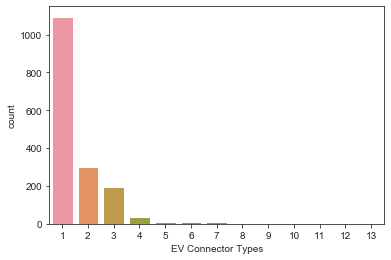

In [30]:
sns.countplot(x='EV Connector Types',data=df2)

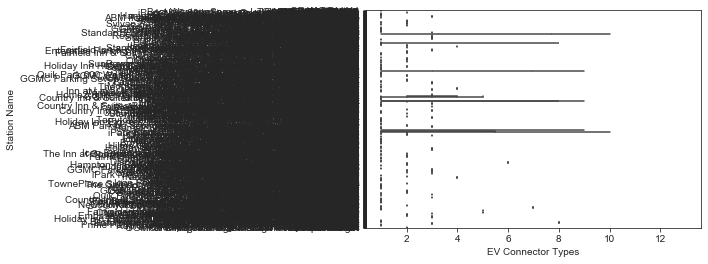

In [31]:
sns.boxplot(x='EV Connector Types',y='Station Name',data=df2,palette='rainbow')

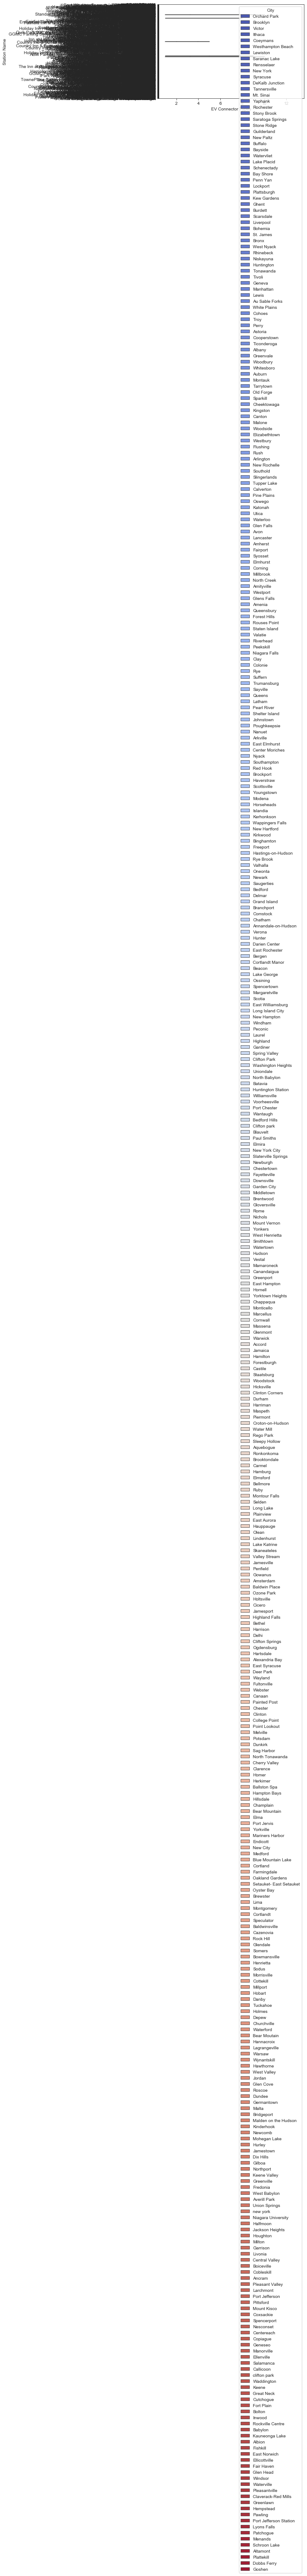

In [35]:
sns.boxplot(x="EV Connector Types",y="Station Name",hue="City",data=df2, palette="coolwarm")

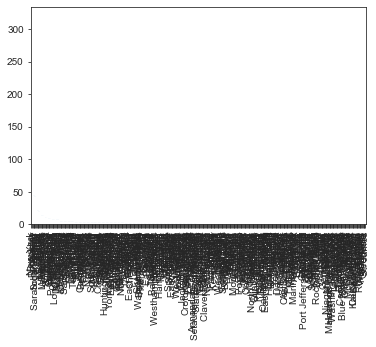

In [36]:
df2['City'].value_counts().plot(kind='bar')

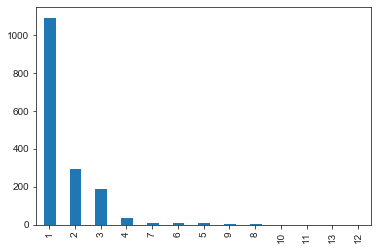

In [37]:
df2['EV Connector Types'].value_counts().plot(kind='bar')